# Machine Learning
## Programming Assignment 2: KNN

#### Instructions:
The aim of this assignment is to give you hands-on experience with a real-life machine learning application.
You will be analyzing the sentiment of tweets using KNN classification.
You can only use the Python programming language and Jupyter Notebooks.
Please use procedural programming style and comment your code thoroughly.
There are two parts of this assignment. In part 1, you can use NumPy, Pandas, Matplotlib, and any other standard Python libraries. You are not allowed to use NLTK, scikit-learn, or any other machine learning toolkit. You can only use scikit-learn in part 2.

### Part 1: Implementing KNN classifier from scratch (75 marks)

You are not allowed to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own KNN classifier from scratch. You may use Pandas, NumPy, Matplotlib, and other standard Python libraries.

#### Problem:
The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You are given the ‘Apple Sentiment Tweets’ dataset that contains around 1630 tweets about Apple labeled as positive, neutral and negative in the form of 1, 0, and -1 respectively. Your task is to implement the k nearest classifier and use it for predicting the sentiments of the tweets about Apple.


In [28]:
## Here are the libraries you will need for this part/
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
from collections import defaultdict
%matplotlib inline

#### Task 1.1: Dataset (5 points)
The dataset contains around 1,630 tweets. There are only two columns in the dataset:
Text: Contains the text of the tweet
Sentiment: Contains the sentiment of the tweet which is divided into three classes: 1 (positive), -1 (negative), and 0 (neutral).

Your task is to read the dataset and stopwords file into a useful data structure. Print out a few tweets and a few items from the stop word list, succesfully being able to do this will earn you 5 points.

In [29]:
# Load tweets data in dataframe
tweetsData = pd.read_csv("Apple Sentiment Tweets.csv")

# Load stopwords in list
with open("stop_words.txt", "r") as file:
    stop_words = file.read().splitlines()


In [30]:
#review tweets data ans structure

# display detail of tweets data to have high level review
tweetsData.info()

#reviewing some tweets data
tweetsData.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [31]:
#checking for missing value in tweets data, to rule out any null tweet or santiment value in data
tweetsData[tweetsData.isnull().any(axis=1)].count()

,0
text,0
sentiment,0


In [32]:

print("Checking stopward sample")
# Print first 10 stopwords to check words
print(stop_words[:10])

Checking stopward sample
['i', "i'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']


#### Task 1.2: Data Preprocessing (10 points)

In the preprocessing step, you’re required to remove the stop words, punctuation marks, numbers, unwanted symbols, hyperlinks, and usernames from the tweets and convert them to lower case. You may find the string and regex module useful for this purpose. Use the stop word list provided within the assignment.

Print out a few random tweets from your dataset, if they conform to the rules mentioned above, you will gain 10 points.

In [33]:
# define function to clean tweets,
#I have tried different combination of cleaning sequance and found last function clean_tweet with best result.

def clean_tweet_old1(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove usernames
    text = re.sub(r"\d+", " ", text)  # repalce numbers with space
    text = re.sub(r"[^\w\s]", " ", text)  # Repalce punctuation with space
    text = re.sub(r"_", " ", text)  # Replace underscore with space
    text = re.sub(r"\s+"," ", text) # Replace multiple spaces with single space between words
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return " ".join(words)  # Join words back into a string


def clean_tweet_old2(text):
    words = text.lower().split()  # Convert to lowercase & tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    text = " ".join(words)  # Join words back into a string

    # Apply cleaning steps after removing stop words
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove usernames
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"_", "", text)  # Remove underscore
    return text  # Return cleaned text

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove usernames
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # repalce numbers with space
    text = re.sub(r"[^\w\s]", "", text)  # Repalce punctuation with space
    text = re.sub(r"_", "", text)  # Replace underscore with space
    #text = re.sub(r"\s+"," ", text) # Replace multiple spaces with single space between words
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return " ".join(words)  # Join words back into a string

In [34]:
# Apply cleaning to all tweets
tweetsData["clean_text"] = tweetsData["text"].apply(clean_tweet)

# Print a few random cleaned tweets
print("Random Cleaned Tweets:")
print(tweetsData["clean_text"].sample(5))  # Print 5 random tweets
tweetsData.head()

Random Cleaned Tweets:
1397    rt gtat creditors want question apples jeff wi...
1624             get shit together ill guy samsung galaxy
1213                                           domt think
132     apple market maker price range forecast update...
1395                      never ever buy itouch worthless
Name: clean_text, dtype: object


,text,sentiment,clean_text
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,wow yall needa step rt music snapchat damn tim...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,happened apple inc aapl apple
2,Thank u @apple I can now compile all of the pi...,1,thank u compile pics communicate one place
3,The oddly uplifting story of the Apple co-foun...,0,oddly uplifting story apple cofounder sold sta...
4,@apple can i exchange my iphone for a differen...,0,exchange iphone different color lmao changed mind


In [35]:
# removing the original 'text' column
tweetsData = tweetsData[["clean_text", "sentiment"]]

# Display the first few rows to verify
tweetsData.head()

,clean_text,sentiment
0,wow yall needa step rt music snapchat damn tim...,-1
1,happened apple inc aapl apple,0
2,thank u compile pics communicate one place,1
3,oddly uplifting story apple cofounder sold sta...,0
4,exchange iphone different color lmao changed mind,0


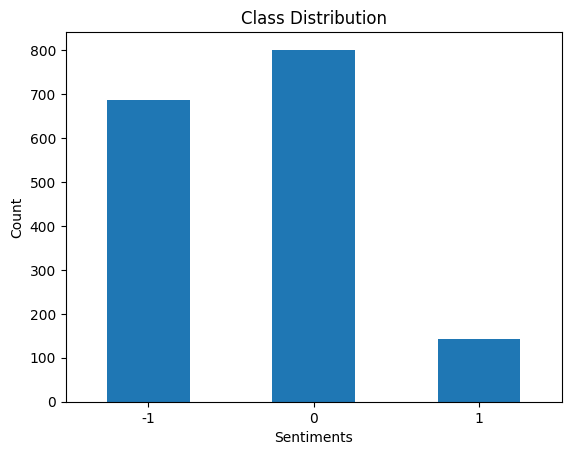

In [36]:
#checking classification distribution of the data
class_counts = tweetsData["sentiment"].value_counts()
class_counts[[-1,0,1]].plot(kind='bar', title='Class Distribution')
plt.title('Class Distribution')
plt.xlabel('Sentiments')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()


#### Task 1.3: Splitting the dataset (5 points)

In this part, divide the given dataset into training and testing sets based on an 80-20 split using python.
Print out the sizes of the training dataset and test dataset, training data should contain 1304 tweets and test data should contain 326 tweets. If your sizes are correct, you get full points.

In [37]:
# Calculate split index (80% for training, 20% for testing)
split_idx = int(0.8 * len(tweetsData))  # 80% of total dataset

# Manually split data through slicing
train_data = tweetsData.iloc[:split_idx]  # First 80% for training
test_data = tweetsData.iloc[split_idx:]   # Last 20% for testing

# Print dataset sizes
print(f"Training Data Size: {len(train_data)}")
print(f"Test Data Size: {len(test_data)}")

Training Data Size: 1304
Test Data Size: 326


#### Task 1.4: Feature Extraction (10 points)

In the feature extraction step, you’ll represent each tweet as a bag-of-words (BoW), that is, an unordered set of words with their position ignored, keeping only their frequency in the tweet. For example, consider the below tweets:
T1 = Welcome to machine learning!
T2 = kNN is a powerful machine learning algorithm.
The bag-of-words representation (ignoring numbers, case, and punctuation) for the above tweets are:

| Vocabulary | welcome | To | machine | learning | knn | is | a | powerful | algorithm |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 |
| T2 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |


Note: We only use the training set to construct the vocabulary for the BoW representation.

Print out the vocabulary as well as the bow representation for a random tweet. Getting the correct output will result in full credit.

In [38]:
# Step 1: Build Vocabulary (Unique Words) from Training Set
vocabSet = set() #declaring set to contain unique list of words collected from tweets

for tweet in train_data["clean_text"]:
    vocabSet.update(tweet.split())  # Add words from each tweet

# Convert vocab to list for indexing
vocabSet = sorted(vocabSet)  # Sorting helps maintain consistency
vocab_dict = {word: idx for idx, word in enumerate(vocabSet)}  # Word-to-index mapping

# Step 2: Convert Tweets into BoW Representation
def tweet_to_bow(tweet, vocab_dict):
    words = tweet.split()
    bow_vector = [0] * len(vocab_dict)  # Initialize vector with zeros
    for word in words:
        if word in vocab_dict:  # Only count words in vocabulary
            bow_vector[vocab_dict[word]] += 1
    return bow_vector

# Ensures we are modifying a separate DataFrame
train_data = train_data.copy()
# Apply BoW transformation to the training data
train_data.loc[:, "bow"] = train_data["clean_text"].apply(lambda x: tweet_to_bow(x, vocab_dict))

# Print Vocabulary and BoW representation for a random tweet
print(f"Total vocabulary size: {len(vocabSet)}")
print("Vocabulary (first 20 words):", list(vocabSet)[:])
random_tweet = train_data.sample(1)  # Select a random tweet
print("\nRandom Tweet:", random_tweet["clean_text"].values[0])
print("\nBoW Representation:", random_tweet["bow"].values[0])

Total vocabulary size: 3259
Vocabulary (first 20 words): ['aapl', 'aapla', 'aaplafterhours', 'aaplalabama', 'aaplapple', 'aaplapples', 'aaplbuzz', 'aaplcorporate', 'aaplcorrupt', 'aapldont', 'aaplexchange', 'aaplheres', 'aaplhow', 'aaplin', 'aaplinch', 'aaplipad', 'aapliphone', 'aaplis', 'aaplnew', 'aaplone', 'aaplpacific', 'aaplpale', 'aaplpm', 'aaplshould', 'aaplsteve', 'aaplupdate', 'aaplwatch', 'aaron', 'abandoned', 'abck', 'abe', 'ability', 'able', 'abrick', 'absolute', 'absolutely', 'abuse', 'access', 'accessible', 'accessory', 'accident', 'according', 'accused', 'achilles', 'act', 'acted', 'action', 'actions', 'activation', 'actor', 'actual', 'actually', 'ad', 'adapters', 'add', 'addis', 'additional', 'address', 'adds', 'adjust', 'admire', 'admits', 'adoptions', 'ads', 'advanced', 'advertisements', 'advertising', 'af', 'afterhours', 'agai', 'aging', 'ago', 'agree', 'agreed', 'agreedhave', 'agreement', 'ahhhhhhh', 'aids', 'aint', 'air', 'airdrop', 'airmiles', 'airmilesshops', 'ai

#### Task 1.5: Create KNN classifier (10 points)

You will create your own k-Nearest Neighbors classifier function by performing the following tasks:
- For a test data point, find its distance from all training instances.
- Sort the calculated distances in ascending order based on distance values.
- Choose k training samples with minimum distances from the test data point.
- Return the most frequent class of these samples. (Your function should work with Euclidean distance as well as Manhattan distance. Pass the distance metric as a parameter in the KNN classifier function. Your function should also be general enough to work with any value of k.)
- For the even values of k given in the above task, break ties by backing off to the k-1 value. (For example, if you have k = 6 nearest neighbors and three of them have the label ‘positive’ and three have the label ‘negative, then you will break off the tie by taking k=5 nearest neighbors. On the other hand, let's say if you have k = 6 nearest neighbors where two have the label ‘positive’, two have the label ‘negative’, and two have the label ‘neutral’. In that case, k =5 will still lead to two labels having a draw in which case you will continue decreasing k until there is a clear winner.)


In [39]:

# Function to calculate distance (Euclidean or Manhattan)
def compute_distance(point1, point2, metric="euclidean"):
    point1, point2 = np.array(point1), np.array(point2)  # Convert lists to NumPy arrays

    if metric == "euclidean":
        return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))
    elif metric == "manhattan":
        return np.sum(np.abs(np.array(point1) - np.array(point2)))
    else:
        raise ValueError("Unsupported distance metric! Use 'euclidean' or 'manhattan'.")


# Custom KNN classifier function
def knn_predict(test_point, train_data, k=3, metric="euclidean",showNN = False):
    distances = []

    # Step 1: Compute distances from the test point to all training points
    for i in range(len(train_data)):
        dist = compute_distance(test_point, train_data.iloc[i]["bow"], metric)
        distances.append((dist, train_data.iloc[i]["sentiment"]))

    # Step 2: Sort distances in ascending order
    distances.sort(key=lambda x: x[0])

    # Step 3: Pick the top K nearest neighbors
    k_neighbors = [label for _, label in distances[:k]]

    # Print intial K neighbor labels to get an idea who were the k nearst neighbors of test point
    if(showNN):
      print(f"K Nearest Neighbors with {metric} Distance are : {k_neighbors}" )

    # Step 4: Break ties by reducing K if necessary
    while k > 1:
        counter = Counter(k_neighbors)
        most_common = counter.most_common()

        if len(most_common) == 1 or most_common[0][1] > most_common[1][1]:
            # If we have a clear majority label, return it
            return most_common[0][0]
        else:
            # Reduce K by 1 and try again
            k -= 1
            k_neighbors = [label for _, label in distances[:k]]

    return k_neighbors[0]  # If k = 1, return the single nearest neighbor's label


In [40]:
#-------------------------------------------------------------------------------------------------------------
#----------------Testing---------------------------------------------------------------------------------------

# Example: Predict sentiment for a random test tweet
# Choose a test example index
test_idx = 1
test_text = test_data.iloc[test_idx]["clean_text"]  # Extract raw cleaned text

# Generate BoW on the fly for the selected test tweet
test_bow = tweet_to_bow(test_text, vocab_dict)

predicted_label = knn_predict(test_bow, train_data, k=5, metric="euclidean", showNN = True)
print(f"Predicted Sentiment for Test Tweet with Euclidean Distance : {predicted_label}")

predicted_label = knn_predict(test_bow, train_data, k=5, metric="manhattan", showNN = True)
print(f"Predicted Sentiment for Test Tweet with Manhattan Distance : {predicted_label}")

K Nearest Neighbors with euclidean Distance are : [0, -1, -1, 0, 0]
Predicted Sentiment for Test Tweet with Euclidean Distance : 0
K Nearest Neighbors with manhattan Distance are : [0, 0, -1, 0, -1]
Predicted Sentiment for Test Tweet with Manhattan Distance : 0


#### Task 1.6: Implement evaluation functions (10 points)

Implement evaluation functions that calculates the:
- classification accuracy,
- F1 score,
- and the confusion matrix
of your classifier on the test set.


In [41]:
# Function to compute classification accuracy
def compute_accuracy(y_testMarking, y_predResults):
    #Comparing test data label with prediction aganist test data to find out correct number of results produced by model
    correct = sum(1 for markedSantiment, pred in zip(y_testMarking, y_predResults) if markedSantiment == pred)
    return correct / len(y_testMarking) * 100  # Convert to percentage

# Function to compute F1 Score (Macro-Averaged is used for Multi-Class as our data set is not well balanced)
def compute_f1_score(y_testMarking, y_predResults):
    class_labels = set(y_testMarking)  # Unique sentiment labels (-1, 0, 1)
    precision_scores, recall_scores, f1_scores = [], [], []

#Calculating measures for each type of labels for there respective scores.
    for label in class_labels:
        tp = sum(1 for markedSantiment, pred in zip(y_testMarking, y_predResults) if markedSantiment == pred == label)
        fp = sum(1 for markedSantiment, pred in zip(y_testMarking, y_predResults) if pred == label and markedSantiment != label)
        fn = sum(1 for markedSantiment, pred in zip(y_testMarking, y_predResults) if markedSantiment == label and pred != label)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    return sum(f1_scores) / len(f1_scores)  # Macro F1 Score

# Function to compute Confusion Matrix
def compute_confusion_matrix(y_testMarking, y_predResults):
    unique_labels = sorted(set(y_testMarking))  # Get unique sentiment labels (-1, 0, 1)
    matrix = {label: defaultdict(int) for label in unique_labels}

    for markedSantiment, pred in zip(y_testMarking, y_predResults):
        matrix[markedSantiment][pred] += 1

    return matrix

In [42]:
#Calculating BOW for all test data rows to avoid later calculation at the time of points comparision
test_data = test_data.copy()  # Ensures we are modifying a separate DataFrame
test_data.loc[:, "bow"] = test_data["clean_text"].apply(lambda x: tweet_to_bow(x, vocab_dict))

In [ ]:
# Generate predictions for the entire test set
y_testMarking = test_data["sentiment"].tolist()
y_predResults = [knn_predict(bow, train_data, k=5, metric="euclidean",showNN=False)
                 for bow in test_data["bow"]]

# Compute and print evaluation metrics
accuracy = compute_accuracy(y_testMarking, y_predResults)
f1_score = compute_f1_score(y_testMarking, y_predResults)
conf_matrix = compute_confusion_matrix(y_testMarking, y_predResults)

print(f"\nAccuracy: {accuracy:.2f}%")
print(f"F1 Score: {f1_score:.4f}")

# Print confusion matrix in readable format
print("\nConfusion Matrix:")

unique_labels = sorted(set(y_testMarking))  # Get unique sentiment labels (-1, 0, 1)
print("{:<20} {}".format("Actual \\ Predicted", " ".join(["{:<6}".format(lbl) for lbl in unique_labels])))
for label in unique_labels:
    row = [conf_matrix[label][lbl] for lbl in unique_labels]
    print(f"{label:<20} {row}")


Accuracy: 61.66%
F1 Score: 0.4916

Confusion Matrix:
Actual \ Predicted   -1     0      1     
-1                   [80, 43, 0]
0                    [48, 117, 0]
1                    [8, 26, 4]


#### Task 1.7: Cross Validation (15 points)

Use 5- fold cross-validation on your training data. (In cross-validation, you divide the training data set into 5 parts. 4 parts will be used for training and 1 part will be used for validation. Then you will take a different part of your data as a validation data set and train your algorithm on the rest of the data set.) Run your KNN function for this data for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do this for both the Euclidean distance and the Manhattan distance for each value of k.

Run your evaluation function for each value of k for both distance metrics, Report classification accuracy, F1 score, and confusion matrix.

Present the results as a graph with k values on the x-axis and classification accuracy on the y-axis. Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric). Make another graph but with the F1 score on the y-axis this time. The graphs should be properly labelled.

In [43]:
#Function to prepare and provide K-Foldes
def k_fold_split(data, k=5):
    """ Splits data into k folds and returns a list of (train, validation) splits. """
    fold_size = len(data) // k
    folds = []
    for i in range(k):
        valSet_data = data.iloc[i * fold_size: (i + 1) * fold_size]  # Validation set
        trainSet_data = data.drop(valSet_data.index)  # Training set
        folds.append((trainSet_data, valSet_data))
    return folds

In [44]:
k_values = range(1, 11)  # K values from 1 to 10
metrics = ["euclidean", "manhattan"]
results = {metric: {"accuracy": [], "f1_score": []} for metric in metrics}

folds = k_fold_split(train_data, k=5) #5 Fold split

for metric in metrics:
    print(f"\nEvaluating for {metric} distance:")

    for k in k_values:
        fold_accuracies, fold_f1_scores = [], []
        foldcounter = 0
        for trainSet_fold, valSet_fold in folds:
            foldcounter += 1
            y_valMarkings = valSet_fold["sentiment"].tolist()
            y_predResults = [knn_predict(val_bow, trainSet_fold, k=k, metric=metric,showNN=False) for val_bow in valSet_fold["bow"]]

            # Evaluate performance
            accuracy = compute_accuracy(y_valMarkings, y_predResults)
            f1_score = compute_f1_score(y_valMarkings, y_predResults)
            print(f"K = {k} : Fold# = {foldcounter} : accuracy = {accuracy} : f1_score = {f1_score} ")

            fold_accuracies.append(accuracy)
            fold_f1_scores.append(f1_score)

        #Compute average performance across 5 folds
        results[metric]["accuracy"].append(np.mean(fold_accuracies))
        results[metric]["f1_score"].append(np.mean(fold_f1_scores))

        print(f"K={k}: Accuracy={np.mean(fold_accuracies):.2f}%, F1 Score={np.mean(fold_f1_scores):.4f}")



Evaluating for euclidean distance:
K = 1 : Fold# = 1 : accuracy = 62.69230769230769 : f1_score = 0.44594964422550626 
K = 1 : Fold# = 2 : accuracy = 66.53846153846153 : f1_score = 0.4659770571335337 
K = 1 : Fold# = 3 : accuracy = 66.92307692307692 : f1_score = 0.541319122644424 
K = 1 : Fold# = 4 : accuracy = 71.15384615384616 : f1_score = 0.5760616600373193 
K = 1 : Fold# = 5 : accuracy = 69.61538461538461 : f1_score = 0.5601097063144677 
K=1: Accuracy=67.38%, F1 Score=0.5179
K = 2 : Fold# = 1 : accuracy = 62.69230769230769 : f1_score = 0.44594964422550626 
K = 2 : Fold# = 2 : accuracy = 66.53846153846153 : f1_score = 0.4659770571335337 
K = 2 : Fold# = 3 : accuracy = 66.92307692307692 : f1_score = 0.541319122644424 
K = 2 : Fold# = 4 : accuracy = 71.15384615384616 : f1_score = 0.5760616600373193 
K = 2 : Fold# = 5 : accuracy = 69.61538461538461 : f1_score = 0.5601097063144677 
K=2: Accuracy=67.38%, F1 Score=0.5179
K = 3 : Fold# = 1 : accuracy = 61.15384615384616 : f1_score = 0.4004

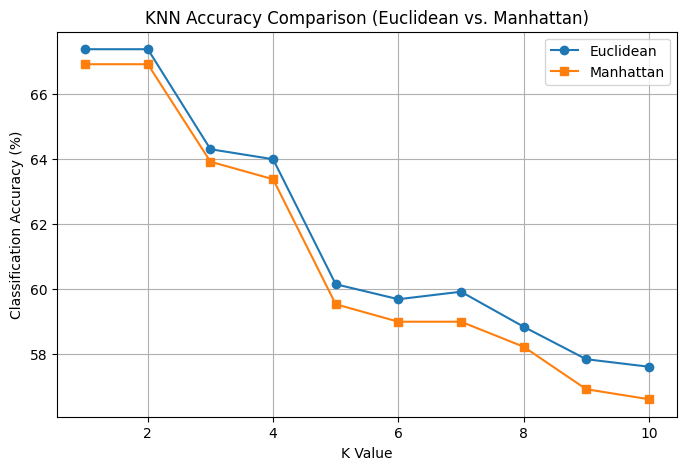

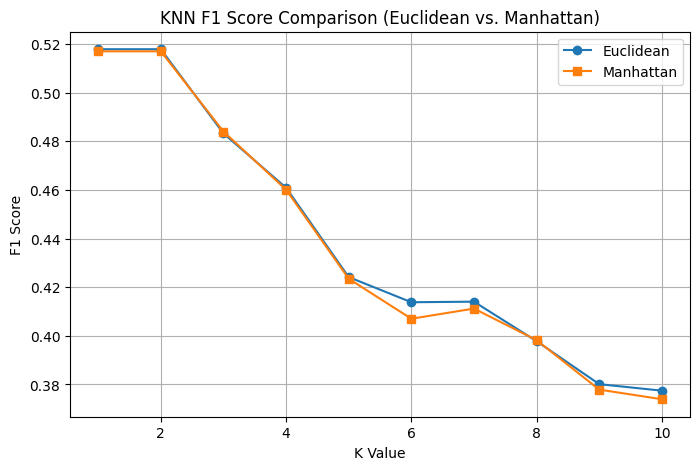

In [45]:
# Toggle: Set to True to use saved results, False to recompute
use_saved_results = False

k_values = list(range(1, 11))  # K values from 1 to 10

if use_saved_results:
    # Manually input the saved results for accuracy and F1-score
    accuracy_euclidean = [69.23, 69.23, 64.31, 64.08, 63.46, 63.77, 65.23, 64.08, 62.31, 62.46]
    accuracy_manhattan = [68.46, 68.46, 63.92, 63.69, 63.00, 63.15, 64.23, 63.31, 61.54, 61.69]

    f1_euclidean = [0.5276, 0.5276, 0.4795, 0.4556, 0.4518, 0.4477, 0.4686, 0.4535, 0.4317, 0.4326]
    f1_manhattan = [0.5265, 0.5265, 0.4811, 0.4574, 0.4537, 0.4489, 0.4660, 0.4472, 0.4244, 0.4252]

else:
    # Compute results dynamically from previously stored `results` dictionary
    accuracy_euclidean = results["euclidean"]["accuracy"]
    accuracy_manhattan = results["manhattan"]["accuracy"]

    f1_euclidean = results["euclidean"]["f1_score"]
    f1_manhattan = results["manhattan"]["f1_score"]

#Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_euclidean, marker="o", label="Euclidean")
plt.plot(k_values, accuracy_manhattan, marker="s", label="Manhattan")
plt.xlabel("K Value")
plt.ylabel("Classification Accuracy (%)")
plt.title("KNN Accuracy Comparison (Euclidean vs. Manhattan)")
plt.legend()
plt.grid(True)
plt.show()

#Plot F1 Score Comparison
plt.figure(figsize=(8, 5))
plt.plot(k_values, f1_euclidean, marker="o", label="Euclidean")
plt.plot(k_values, f1_manhattan, marker="s", label="Manhattan")
plt.xlabel("K Value")
plt.ylabel("F1 Score")
plt.title("KNN F1 Score Comparison (Euclidean vs. Manhattan)")
plt.legend()
plt.grid(True)
plt.show()

#### Task 1.8: Classification (10 points)

Finally, use the best value of k for both distance metrics and run it on the test data set. Find the F1 score, classification accuracy, and confusion matrix and print them.

You accuracy should be above 75 and f1 score should be above 60 to get full points.

In [ ]:
# Best K values from cross-validation
best_k = 2
metrics = ["euclidean", "manhattan"]

# Store results
final_results = {}

for metric in metrics:
    print(f"\nRunning Final KNN Classification with K={best_k} and {metric} distance")

    # Generate predictions for test set
    y_testMarkings = test_data["sentiment"].tolist()
    y_predResults = [knn_predict(bow, train_data, k=best_k, metric=metric, showNN = False)
              for bow in test_data["bow"]]

    # Compute final evaluation metrics
    accuracy = compute_accuracy(y_testMarkings, y_predResults)
    f1_score = compute_f1_score(y_testMarkings, y_predResults)
    conf_matrix = compute_confusion_matrix(y_testMarkings, y_predResults)

    # Store results
    final_results[metric] = {"accuracy": accuracy, "f1_score": f1_score, "conf_matrix": conf_matrix}

    # Print results
    print(f"Final Accuracy: {accuracy:.2f}%")
    print(f"Final F1 Score: {f1_score:.4f}")

    # Print confusion matrix in readable format
    print("\nConfusion Matrix:")
    unique_labels = sorted(set(y_testMarkings))
    print("{:<20} {}".format("Actual \\ Predicted", " ".join(["{:<6}".format(lbl) for lbl in unique_labels])))
    for label in unique_labels:
        row = [conf_matrix[label][lbl] for lbl in unique_labels]
        print(f"{label:<20} {row}")



Running Final KNN Classification with K=2 and euclidean distance
Final Accuracy: 71.78%
Final F1 Score: 0.6296

Confusion Matrix:
Actual \ Predicted   -1     0      1     
-1                   [65, 57, 1]
0                    [5, 157, 3]
1                    [3, 23, 12]

Running Final KNN Classification with K=2 and manhattan distance
Final Accuracy: 70.86%
Final F1 Score: 0.6229

Confusion Matrix:
Actual \ Predicted   -1     0      1     
-1                   [62, 61, 0]
0                    [5, 157, 3]
1                    [3, 23, 12]


### Part 2:  kNN classifier using scikit-learn (25 points)

In this part, you have to use scikit-learn’s KNN implementation to train and test your classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1 but this time using scikit-learn. Use your bag of words to do cross-validation and run the KNN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean and Manhattan distance. Use scikit-learn’s accuracy score function to calculate the accuracy, classification_report to calculate macro-average (precision, recall, and F1), and confusion matrix function to calculate confusion matrix for test data. Also present the results as a graph with k values on the x-axis and performance measures on the y-axis just like you did in part 1. Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric). Finally, print the best values of k for both distance metrics. Then use this value of k on the test data set and print the evaluation scores.

To get full marks, the accuracy score, classification reports and confusion matrix must be shown for both distance metrics and values for accuracy and F1 should be similar to those obtained in the previous part.

In [ ]:
# Here are the libraries and specific functions needing for this part

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt  # Required for visualization
import numpy as np  # Required for numerical operations (optional, but useful)

**Prepare Data**

In [ ]:
# Extract BoW feature matrix and labels for training
X_train = np.array(train_data["bow"].tolist())  # Convert BoW to NumPy array
y_train = train_data["sentiment"].values  # Sentiment labels

X_test = np.array(test_data["bow"].tolist())  # BoW for test data
y_test = test_data["sentiment"].values  # Test labels

**Run Cross-Validation for k = 1 to 10**

In [ ]:
k_values = range(1, 11)  # K values from 1 to 10
metrics = ["euclidean", "manhattan"]
results = {metric: {"accuracy": [], "f1_score": []} for metric in metrics}

for metric in metrics:
    print(f"\nEvaluating for {metric} distance:")

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights="distance")

        # Perform 5-fold cross-validation
        accuracy = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
        f1 = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="f1_macro"))

        results[metric]["accuracy"].append(accuracy * 100)  # Convert to percentage
        results[metric]["f1_score"].append(f1)

        print(f"K={k}: Accuracy={accuracy:.2f}%, F1 Score={f1:.4f}")


Evaluating for euclidean distance:
K=1: Accuracy=0.67%, F1 Score=0.5255
K=2: Accuracy=0.69%, F1 Score=0.5367
K=3: Accuracy=0.65%, F1 Score=0.5004
K=4: Accuracy=0.66%, F1 Score=0.5113
K=5: Accuracy=0.64%, F1 Score=0.4980
K=6: Accuracy=0.65%, F1 Score=0.4890
K=7: Accuracy=0.64%, F1 Score=0.4678
K=8: Accuracy=0.64%, F1 Score=0.4679
K=9: Accuracy=0.64%, F1 Score=0.4717
K=10: Accuracy=0.63%, F1 Score=0.4624

Evaluating for manhattan distance:
K=1: Accuracy=0.67%, F1 Score=0.5243
K=2: Accuracy=0.69%, F1 Score=0.5368
K=3: Accuracy=0.65%, F1 Score=0.5004
K=4: Accuracy=0.66%, F1 Score=0.5060
K=5: Accuracy=0.64%, F1 Score=0.4947
K=6: Accuracy=0.65%, F1 Score=0.4947
K=7: Accuracy=0.64%, F1 Score=0.4996
K=8: Accuracy=0.64%, F1 Score=0.4939
K=9: Accuracy=0.64%, F1 Score=0.4929
K=10: Accuracy=0.63%, F1 Score=0.4945


**Plot Accuracy & F1-Score Graphs**

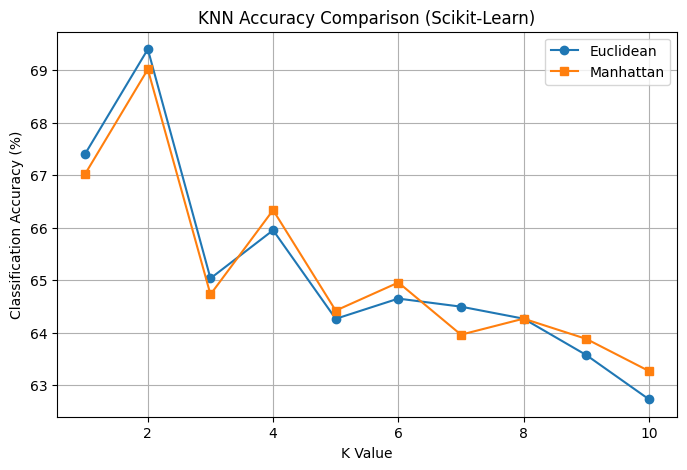

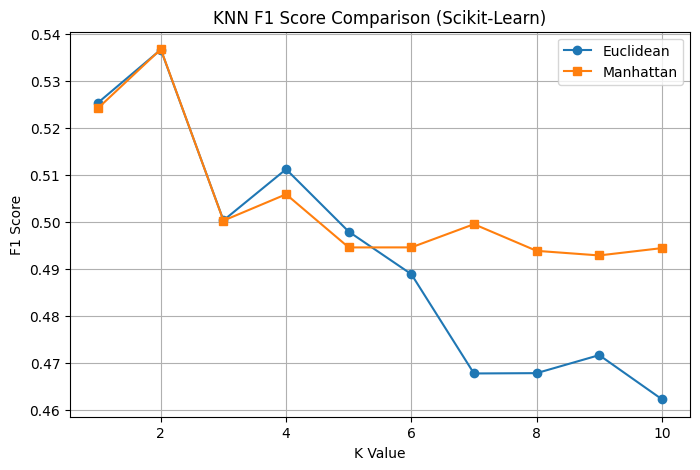

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.plot(k_values, results["euclidean"]["accuracy"], marker="o", label="Euclidean")
plt.plot(k_values, results["manhattan"]["accuracy"], marker="s", label="Manhattan")
plt.xlabel("K Value")
plt.ylabel("Classification Accuracy (%)")
plt.title("KNN Accuracy Comparison (Scikit-Learn)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(8, 5))
plt.plot(k_values, results["euclidean"]["f1_score"], marker="o", label="Euclidean")
plt.plot(k_values, results["manhattan"]["f1_score"], marker="s", label="Manhattan")
plt.xlabel("K Value")
plt.ylabel("F1 Score")
plt.title("KNN F1 Score Comparison (Scikit-Learn)")
plt.legend()
plt.grid(True)
plt.show()

**Find the Best K for Each Metric**

In [ ]:
best_k_euclidean = k_values[np.argmax(results["euclidean"]["accuracy"])]
best_k_manhattan = k_values[np.argmax(results["manhattan"]["accuracy"])]

print(f"\nBest K for Euclidean distance: {best_k_euclidean}")
print(f"Best K for Manhattan distance: {best_k_manhattan}")


Best K for Euclidean distance: 2
Best K for Manhattan distance: 2


**Run Final Model on Test Data**

In [ ]:
metrics = ["euclidean", "manhattan"]
final_k_values = {"euclidean": best_k_euclidean, "manhattan": best_k_manhattan}

for metric in metrics:
    best_k = final_k_values[metric]
    print(f"\nFinal Model using K={best_k} and {metric} distance")

    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)  # Train on full training set
    y_pred = knn.predict(X_test)  # Predict on test set

    # Compute final evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"]
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Final Accuracy: {accuracy:.2f}%")
    print(f"Final F1 Score: {f1:.4f}")

    # Print Confusion Matrix
    print("\nConfusion Matrix:")
    print(conf_matrix)


Final Model using K=2 and euclidean distance
Final Accuracy: 71.17%
Final F1 Score: 0.5403

Confusion Matrix:
[[ 76  47   0]
 [ 12 153   0]
 [  8  27   3]]

Final Model using K=2 and manhattan distance
Final Accuracy: 70.86%
Final F1 Score: 0.5358

Confusion Matrix:
[[ 72  51   0]
 [  9 156   0]
 [  8  27   3]]


In my opnion class distribution of dataset is not balanced which is causing the high number of miss jugdment by model in classification of -1 and very few are classified with 1